In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

In [11]:
curve = np.load("Precision_Recall_Curve.npy", allow_pickle = True).item()
print(curve)

{'Precision': array([0.22704305, 0.22704118, 0.22705053, ..., 1.        , 1.        ,
       1.        ]), 'Recall': array([1.00000000e+00, 9.99974092e-01, 9.99974092e-01, ...,
       5.18161563e-05, 2.59080781e-05, 0.00000000e+00]), 'Thresholds': array([3.2633543e-05, 3.2663345e-05, 3.2693148e-05, ..., 9.9999857e-01,
       9.9999869e-01, 9.9999917e-01], dtype=float32)}


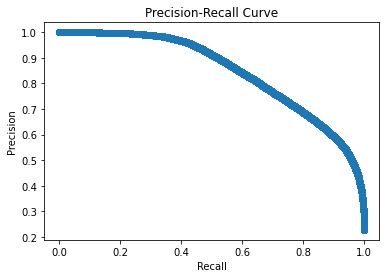

In [4]:
plt.figure()
plt.scatter(curve['Recall'], curve['Precision'])
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision');

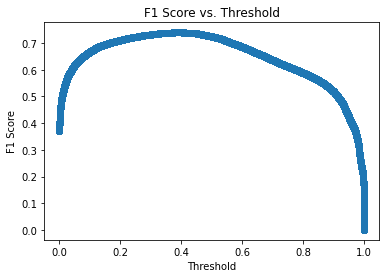

In [5]:
f1_scores = 2  / (1 / curve['Recall'][:-1] + 1 / curve['Precision'][:-1])

plt.figure()
plt.scatter(curve['Thresholds'], f1_scores)
plt.title('F1 Score vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1 Score');

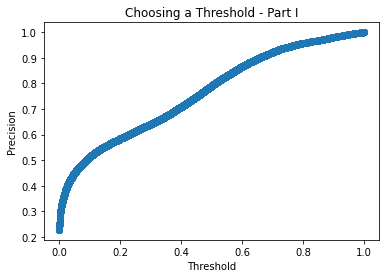

In [6]:
plt.figure()
plt.scatter(curve['Thresholds'], curve['Precision'][:-1])
plt.title('Choosing a Threshold - Part I')
plt.xlabel('Threshold')
plt.ylabel('Precision');

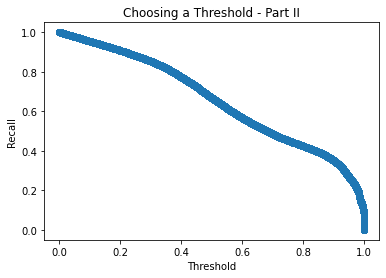

In [7]:
plt.figure()
plt.scatter(curve['Thresholds'], curve['Recall'][:-1])
plt.title('Choosing a Threshold - Part II')
plt.xlabel('Threshold')
plt.ylabel('Recall');

In [8]:
curve['Thresholds'][np.argmax(f1_scores)]

0.39079127

In [35]:
predicted = np.load("Predictions.npy", allow_pickle = True)
actual = np.load("Actual.npy", allow_pickle = True)
print(predicted[0], actual[0])

[9.3338239e-01 7.3953509e-01 1.2657106e-02 1.0421786e-01 1.1166036e-03
 1.4179647e-03 2.9802322e-08 2.9802322e-08 2.9802322e-08 2.9802322e-08
 2.9802322e-08 2.9802322e-08 2.9802322e-08 2.9802322e-08 2.9802322e-08
 2.9802322e-08 2.9802322e-08 2.9802322e-08 2.9802322e-08 2.9802322e-08
 2.9802322e-08 2.9802322e-08 2.9802322e-08 2.9802322e-08 2.9802322e-08
 2.9802322e-08 2.9802322e-08 2.9802322e-08 2.9802322e-08 2.9802322e-08
 2.9802322e-08 2.9802322e-08 2.9802322e-08 2.9802322e-08 2.9802322e-08
 2.9802322e-08 2.9802322e-08 2.9802322e-08 2.9802322e-08 2.9802322e-08
 2.9802322e-08 2.9802322e-08 2.9802322e-08 2.9802322e-08 2.9802322e-08
 2.9802322e-08 2.9802322e-08 2.9802322e-08 2.9802322e-08 2.9802322e-08
 2.9802322e-08 2.9802322e-08 2.9802322e-08 2.9802322e-08 2.9802322e-08
 2.9802322e-08 2.9802322e-08 2.9802322e-08 2.9802322e-08 2.9802322e-08
 2.9802322e-08 2.9802322e-08 2.9802322e-08 2.9802322e-08 2.9802322e-08
 2.9802322e-08 2.9802322e-08 2.9802322e-08 2.9802322e-08 2.9802322e-08
 2.980

In [36]:
compton = np.load("Compton.npy", allow_pickle = True)
print(compton[0])

[1. 1. 0. 0. 0. 0.]


In [40]:
filt_pred = []
filt_act = []

for i in range(len(predicted)):
    mask = compton[i].astype(int)
    mask = np.pad(mask, [(0, len(predicted[i]) - len(mask))], mode = 'constant').astype(bool)
    filt_pred.append(predicted[i][mask])
    filt_act.append(actual[i][mask])
    
print(filt_pred[0], filt_act[0])

[0.9333824 0.7395351] [1. 1.]


In [49]:
new_precisions, new_recalls, new_thresholds = precision_recall_curve(np.hstack(np.array(filt_act)), 
                                                                     np.hstack(np.array(filt_pred)))

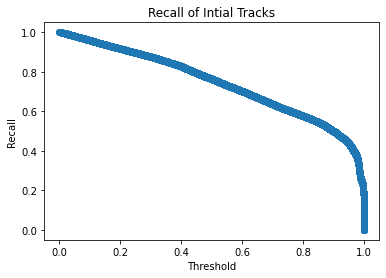

In [55]:
plt.figure()
plt.scatter(new_thresholds, new_recalls[:-1])
plt.title('Recall of Intial Tracks')
plt.xlabel('Threshold')
plt.ylabel('Recall');